In [45]:
attach(fda::growth)

In [43]:
library(fda.usc)
library(fda)

df <- fda::growth
X <- cbind(growth$hgtm, growth$hgtf)
GRILLA <- growth$age
factores <- data.frame(
    varon=as.factor(startsWith(colnames(X) , "boy"))
)
X.fd <- fdata(
    mdata=t(X),
    argvals=GRILLA,
    names=list(main="Alturas", xlab="Edad", ylab="Altura [cm]")
)
test <- fanova.RPm(X.fd, ~ varon, factores, RP=1)
print(test$p.FDR)

           varon
RP1 4.526837e-07


In [3]:
library(fda.usc)
library(fda)

In [19]:
df <- growth
X <- cbind(growth$hgtm, growth$hgtf)
GRILLA <- growth$age
varon <- startsWith(colnames(X) , "boy")
control <- sample(varon)
factores <- data.frame(
    varon=as.factor(varon),
    control=as.factor(control)
)
X.fd <- fdata(
    mdata=t(X),  # fda.usc::fdata espera una matrix de 1 obs/fila y 1 medicion/col
    argvals=GRILLA,
    names=list(main="Alturas", xlab="Edad", ylab="Altura [cm]")
)

In [31]:
res <- fanova.RPm(X.fd, ~ varon + control + varon * control, factores, RP=1, hetero=FALSE)

In [32]:
for (metodo in c("Bonf", "Boot", "FDR")) {
    print(paste("Metodo:", metodo))
    print(res[[paste0("p.", metodo)]])
}

[1] "Metodo: Bonf"
           varon   control varon:control
RP1 2.276428e-05 0.3997294     0.1610527
[1] "Metodo: Boot"
NULL
[1] "Metodo: FDR"
           varon   control varon:control
RP1 2.276428e-05 0.3997294     0.1610527


In [209]:
library(fda.usc)
# library(tidyverse)

# Funciones auxiliares
source("../practicas/helpers.R")
# Dispositivos graficos
library(repr)
options(repr.plot.width=20, repr.plot.height=13)

In [116]:
setwd("~/maestria/funcional/presentacion")

In [272]:
dfx <- read.csv("Vessel_X.txt", header=FALSE)
dfy <- read.csv("Vessel_Y.txt", header=FALSE)
na2o <- dfy[,1]

In [273]:
GRILLA <- 100:400

In [274]:
X <- fdata(dfx, argvals=100:400, names=list(main="Vasijas", xlab="Frecuencia", ylab="Energia"))

In [297]:
bajo_sodio <- na2o < 10
uniforme <- rbinom(180, 1, 0.5)
# For `sample` the default for size is the number of items inferred from the first argument,
# so that sample(x) generates a random permutation of the elements of x (or 1:x). 
mezcla <- sample(bajo_sodio)
factores <- data.frame(
    bajo_sodio=as.factor(bajo_sodio),
    uniforme=as.factor(uniforme),
    mezcla=as.factor(mezcla)
)

In [298]:
res <- fanova.RPm(X, ~ bajo_sodio + uniforme + mezcla, factores, RP=10, nboot = 1e3, hetero=FALSE)

  |======================================================================| 100%


In [299]:
for (metodo in c("Bonf", "Boot", "FDR")) {
    print(paste("Metodo:", metodo))
    print(res[[paste0("p.", metodo)]])
}

[1] "Metodo: Bonf"
       bajo_sodio uniforme mezcla
RP10 2.034137e-20        1      1
[1] "Metodo: Boot"
     bajo_sodio uniforme mezcla
RP10          0    0.632  0.704
[1] "Metodo: FDR"
       bajo_sodio  uniforme    mezcla
RP10 2.034137e-20 0.9807452 0.9943049


In [300]:
dirs_aleatorias <- res$proj$data

In [301]:
proyecciones <- X$data %*% dir_aleatoria

In [308]:
mean(proyecciones[bajo_sodio])
mean(proyecciones[!bajo_sodio])
mean(proyecciones[uniforme])
mean(proyecciones[!uniforme])
mean(proyecciones[mezcla])
mean(proyecciones[!mezcla])

[1] -282.1067

[1] -856.6274

[1] -852.7992

[1] -733.1638

[1] -725.3336

[1] -745.8207

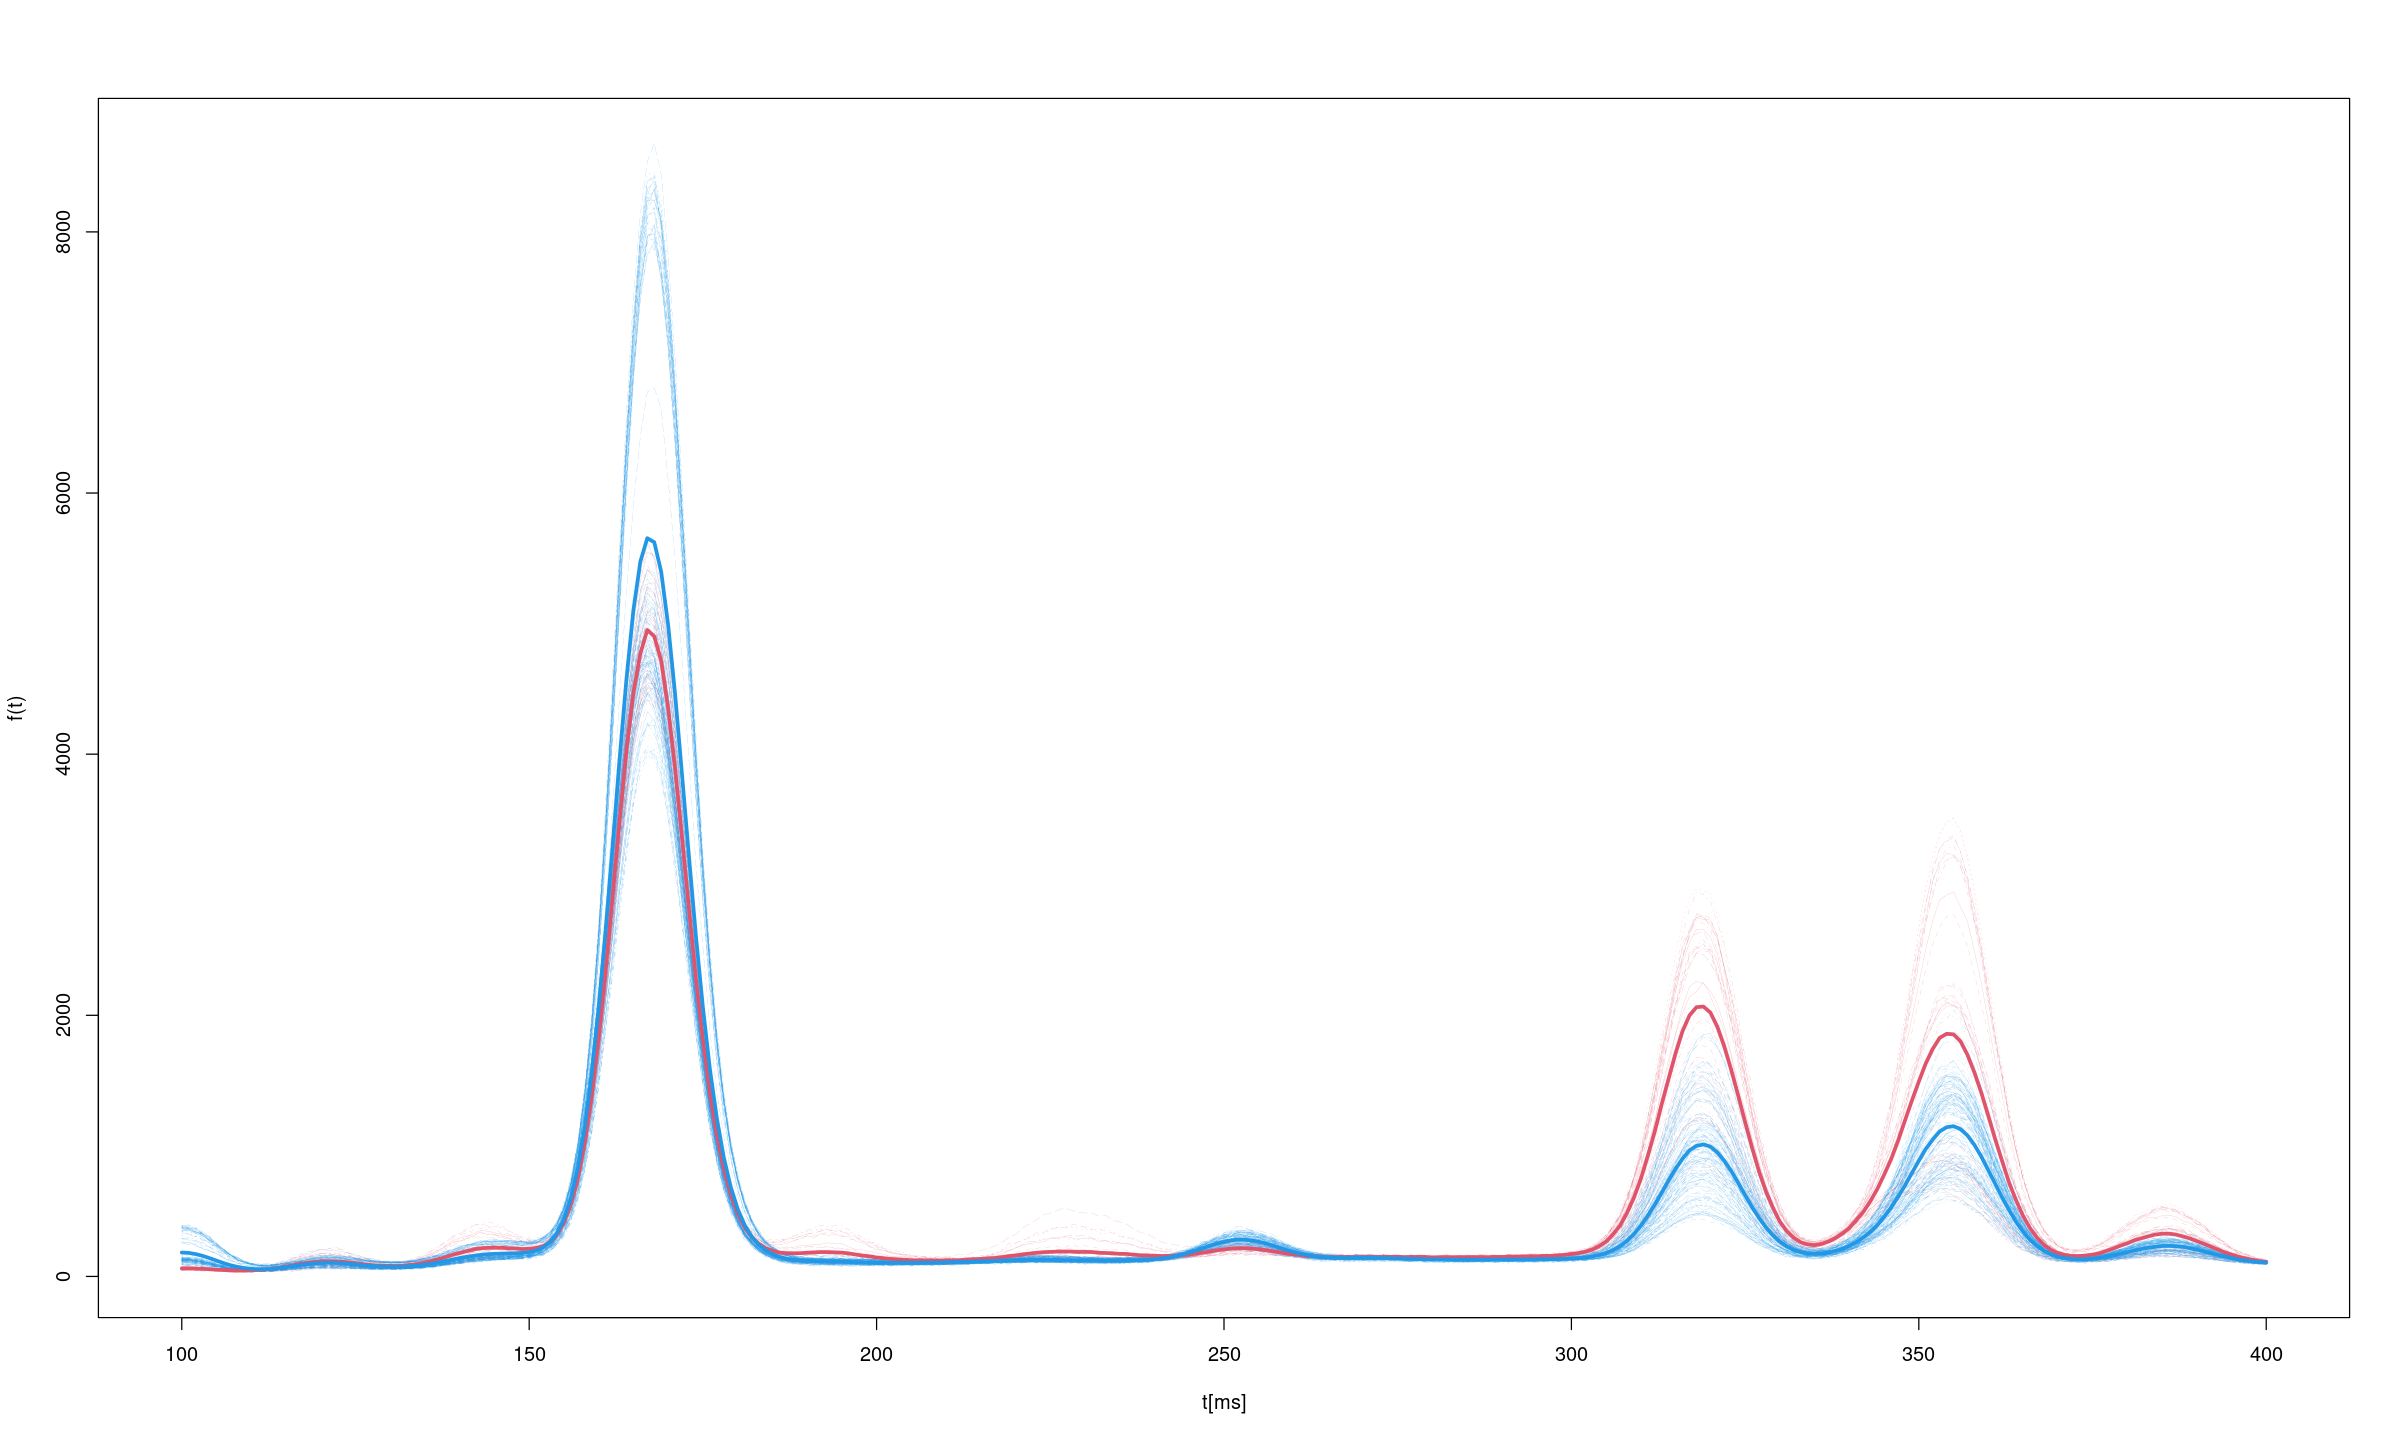

In [304]:
options(repr.plot.width=20, repr.plot.height=12)
matplot(GRILLA, t(dfx), type='l', xlab='t[ms]', ylab='f(t)', col=ifelse(bajo_sodio, 2, 4), lwd=0.1)
lines(GRILLA, get_muhat(t(dfx[bajo_sodio,])), col=2, lwd=3)
lines(GRILLA, get_muhat(t(dfx[!bajo_sodio,])), col=4, lwd=3)

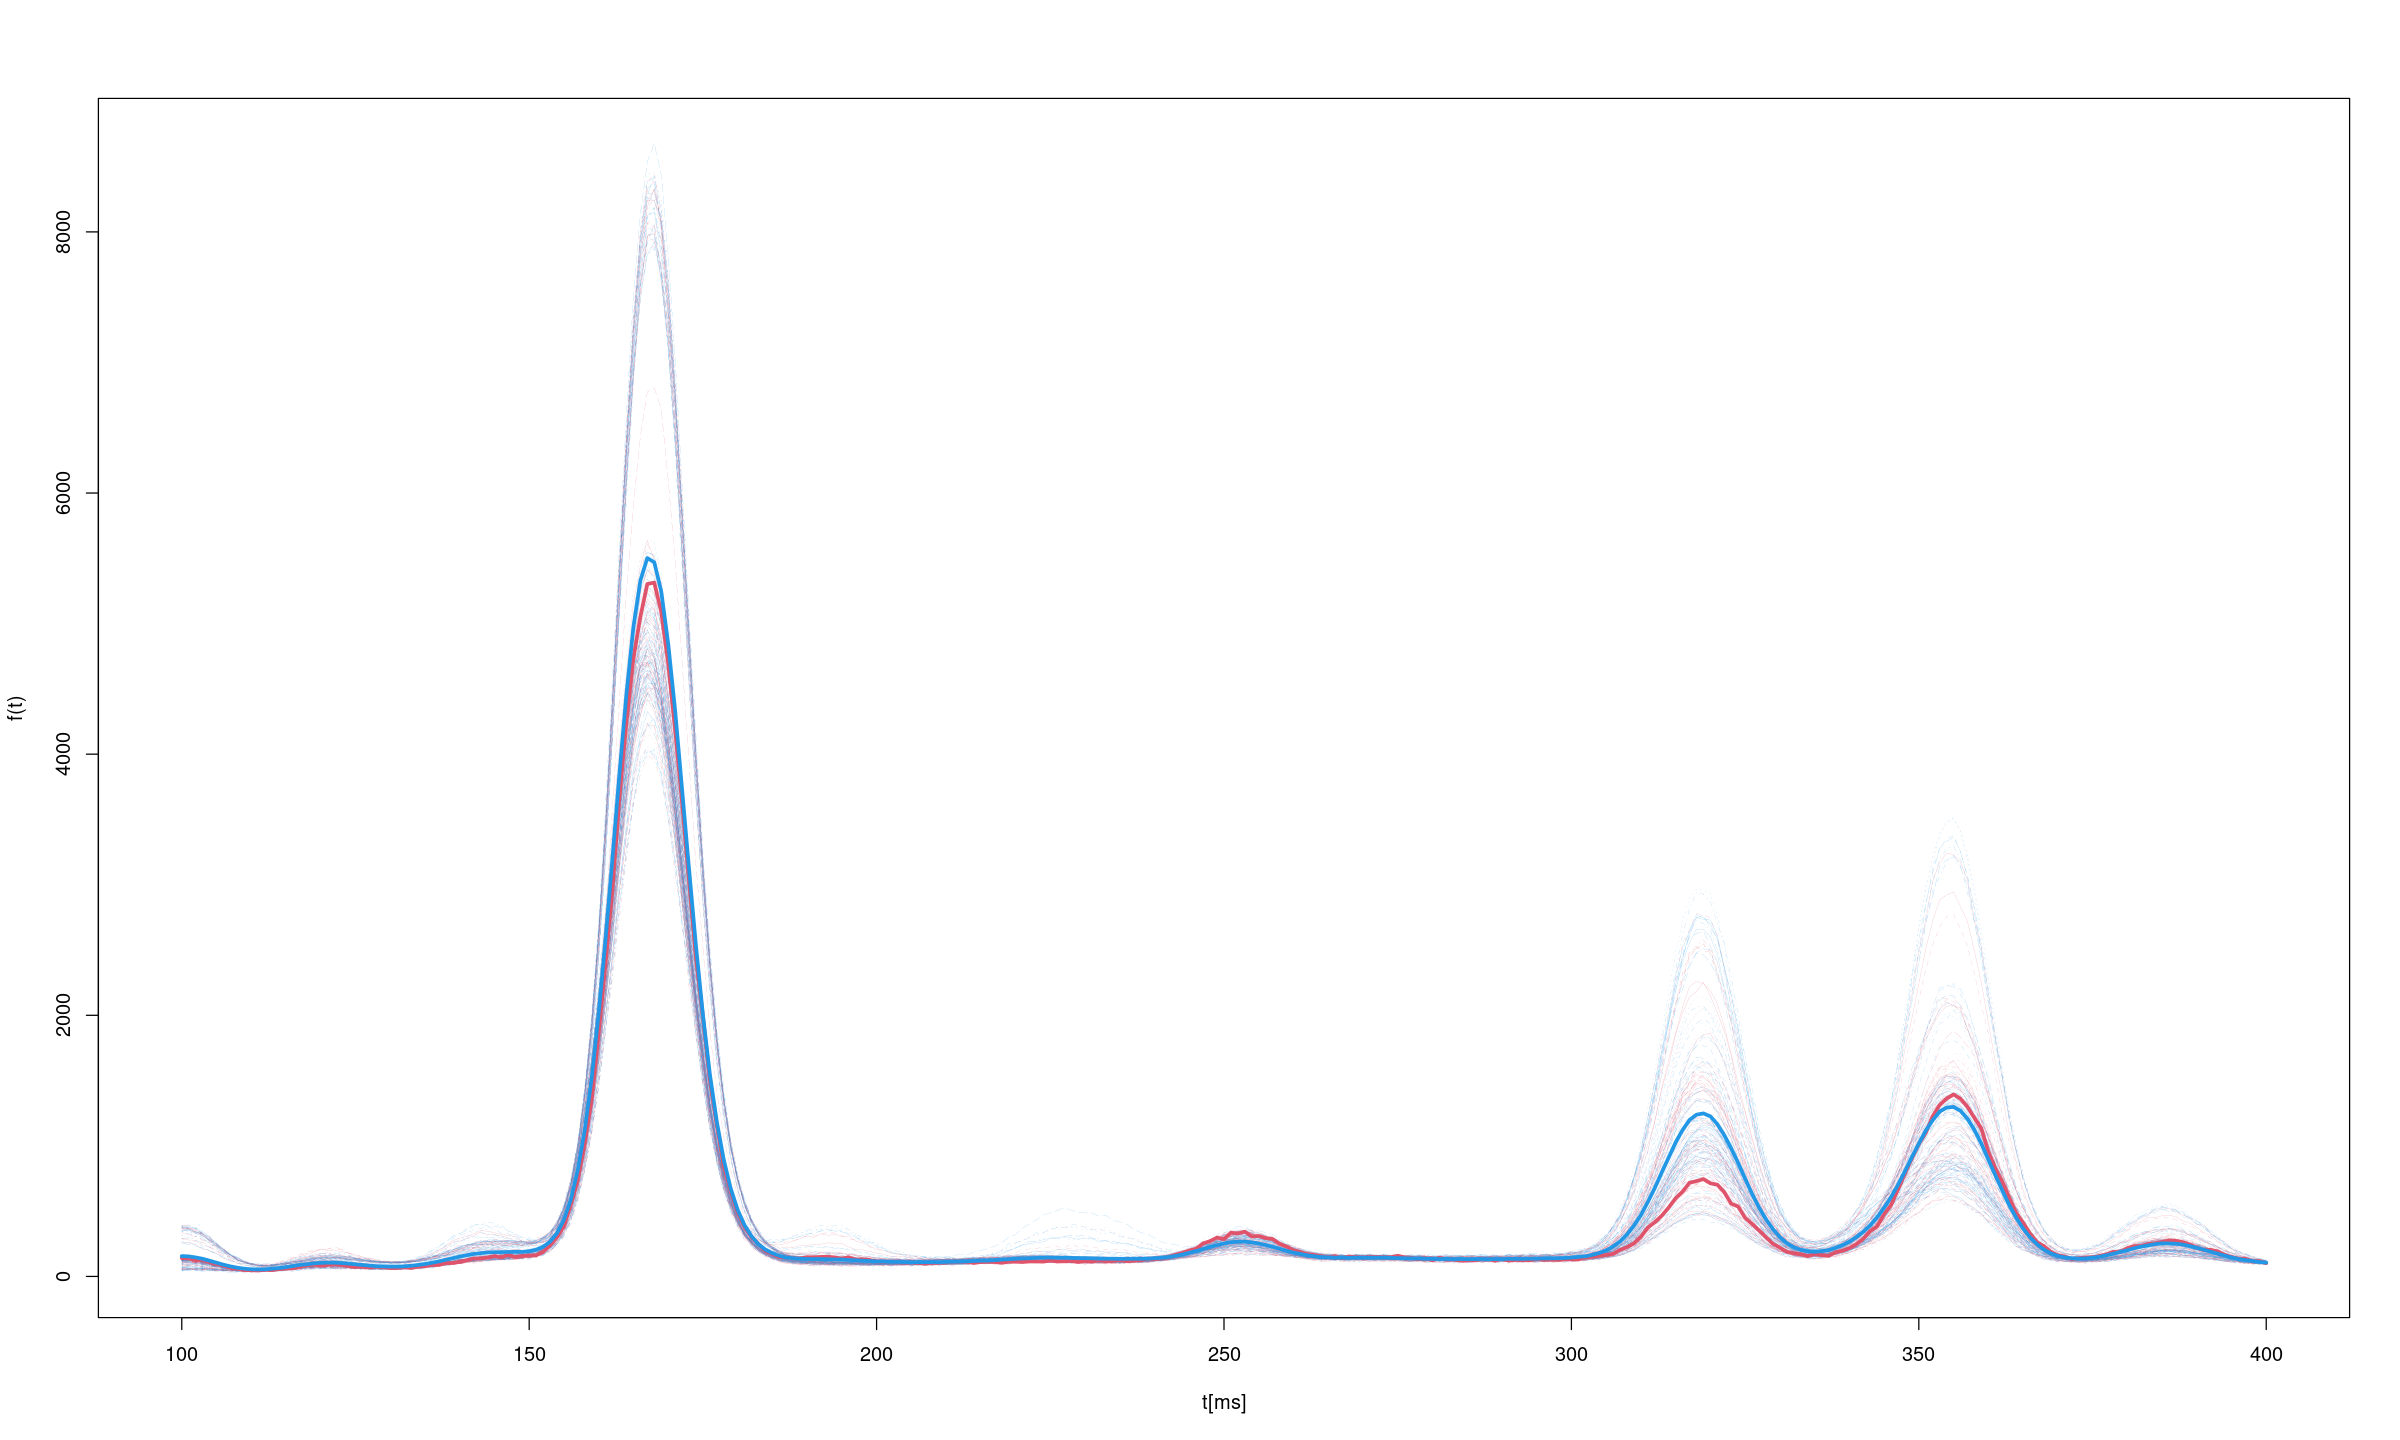

In [305]:
options(repr.plot.width=20, repr.plot.height=12)
matplot(GRILLA, t(dfx), type='l', xlab='t[ms]', ylab='f(t)', col=ifelse(uniforme, 2, 4), lwd=0.1)
lines(GRILLA, get_muhat(t(dfx[uniforme,])), col=2, lwd=3)
lines(GRILLA, get_muhat(t(dfx[!uniforme,])), col=4, lwd=3)

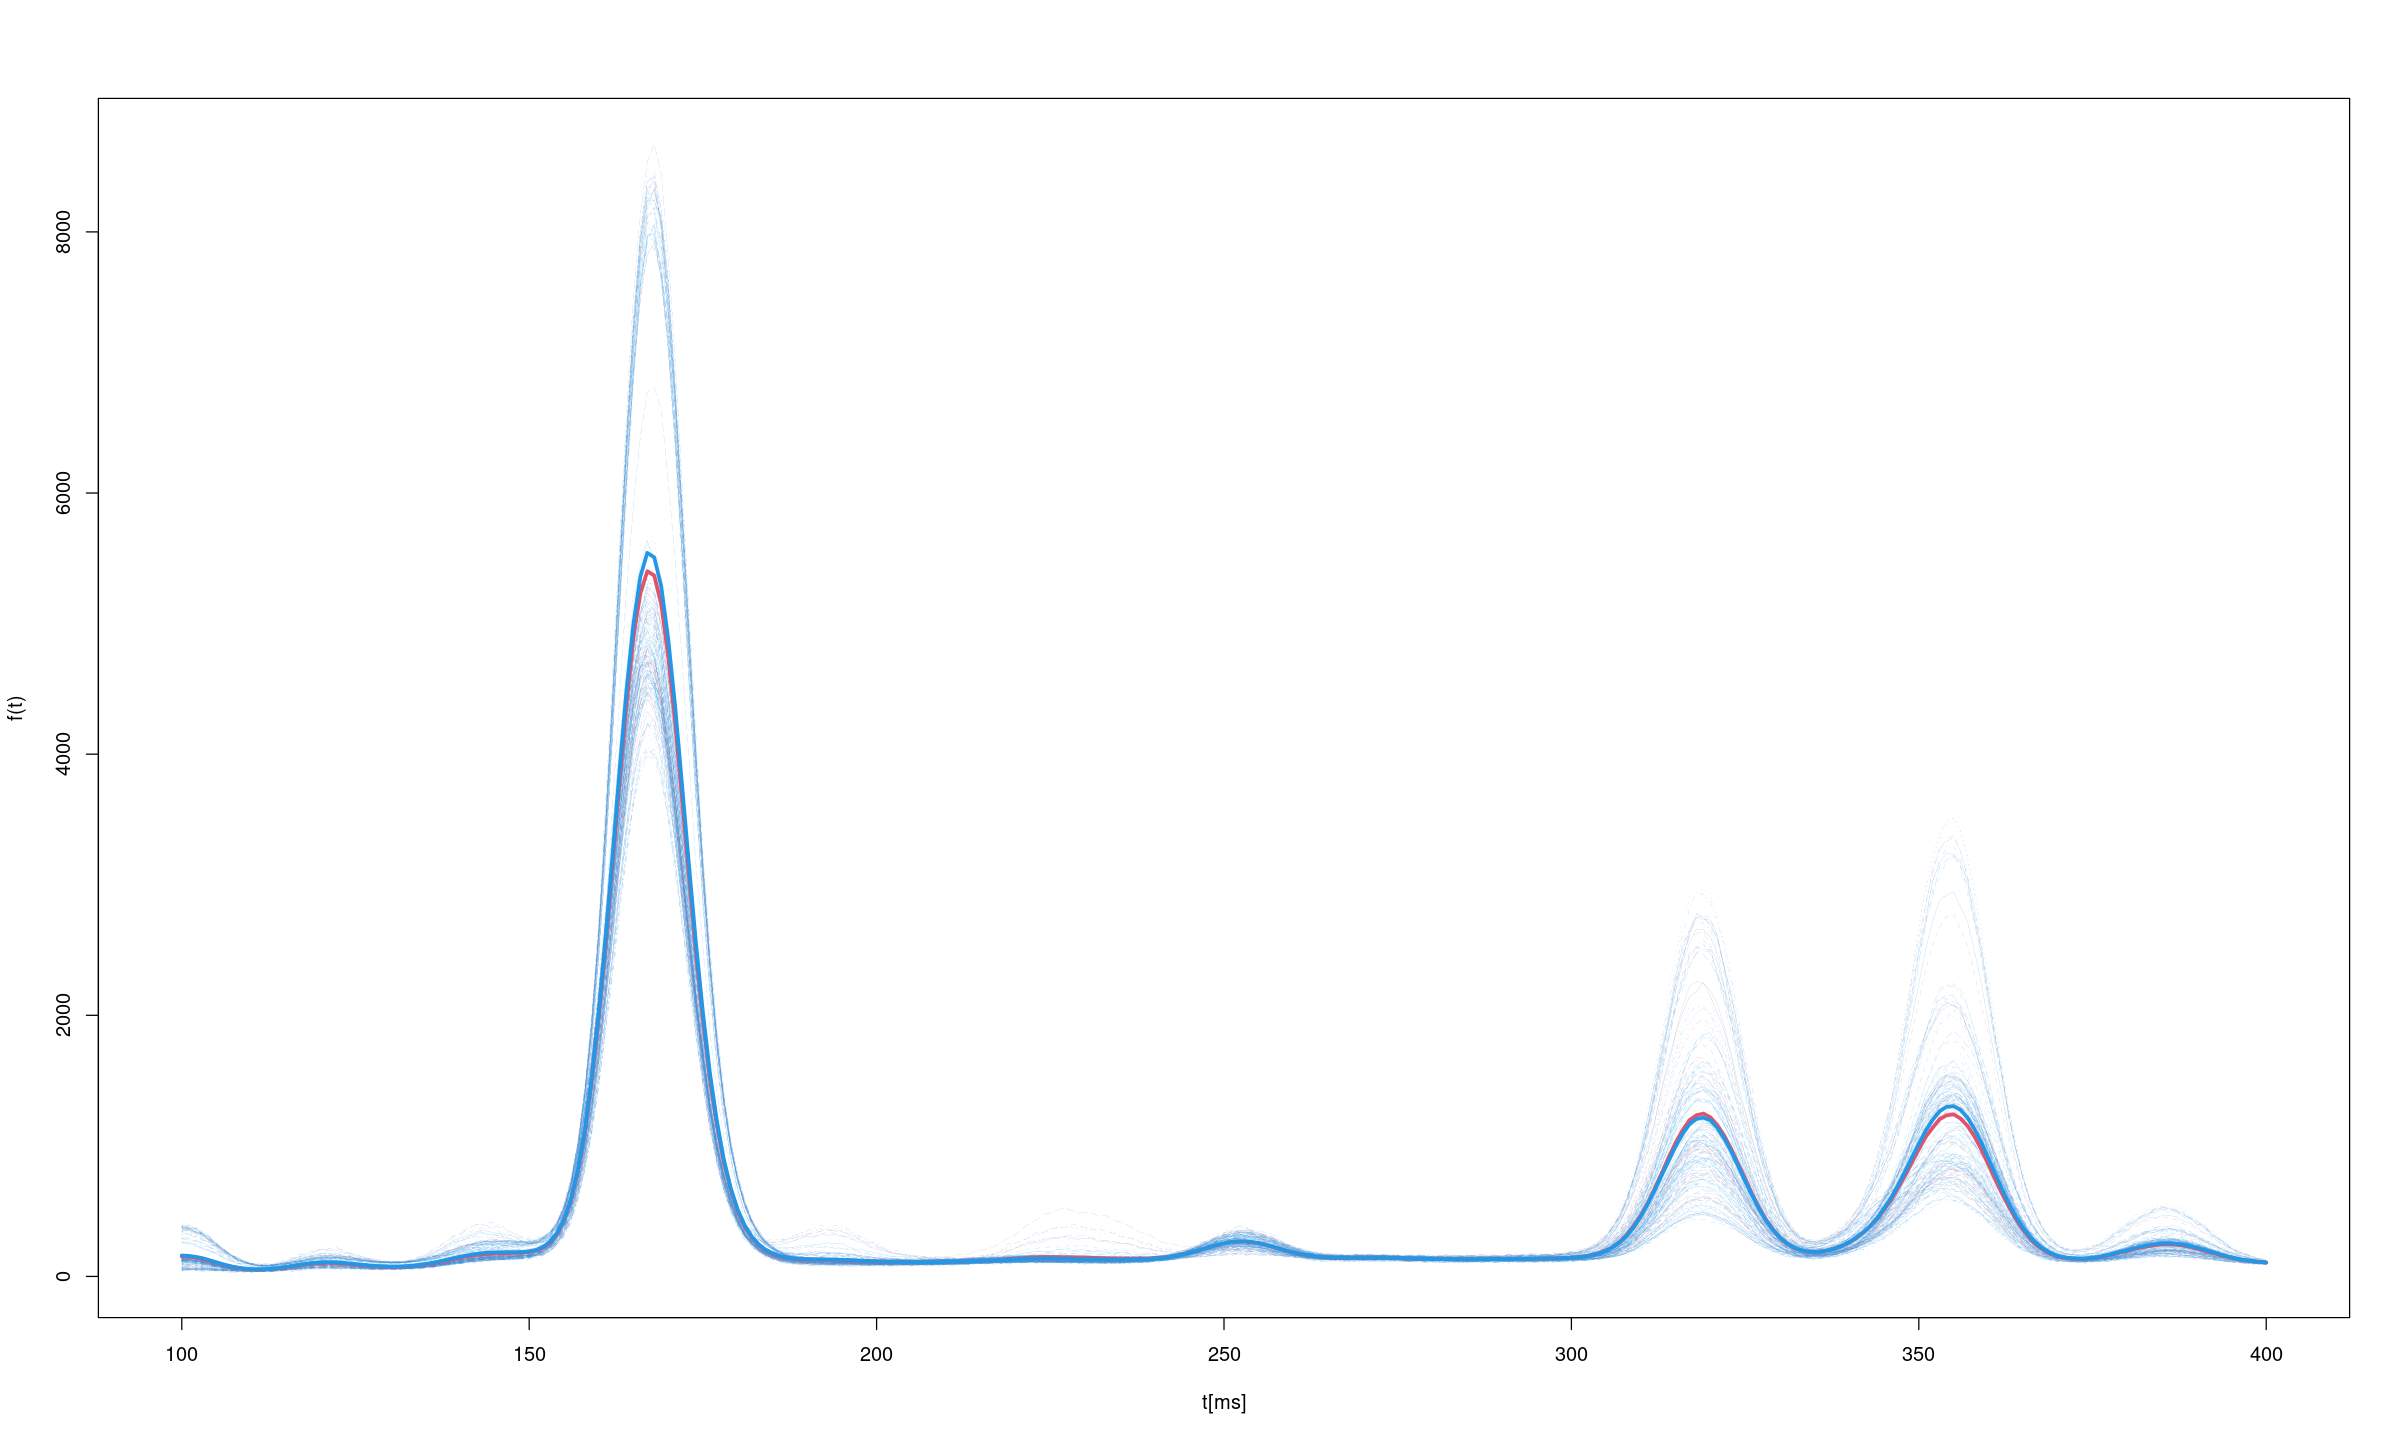

In [306]:
options(repr.plot.width=20, repr.plot.height=12)
matplot(GRILLA, t(dfx), type='l', xlab='t[ms]', ylab='f(t)', col=ifelse(mezcla, 2, 4), lwd=0.1)
lines(GRILLA, get_muhat(t(dfx[mezcla,])), col=2, lwd=3)
lines(GRILLA, get_muhat(t(dfx[!mezcla,])), col=4, lwd=3)

In [90]:
help(fanova.RPm)

fanova.RPm {fda.usc},R Documentation
object,Functional response data. Object with class fdata with n curves discretizated in m points. For multivariate problems object can be a data.frame or a matrix
formula,as formula without response.
data.fac,"Explanatory variables. Data frame with dimension (n x p), where p are the number of factors or covariates considered."
RP,Vector of number of random projections.
alpha,"Alpha value, by defalult alpha=0.95."
zproj,Function for generating the projections or an object that contains that projections.
par.zproj,List of parameters for zproj function.
hetero,logical. If TRUE (by default) means heteroskedastic ANOVA.
pr,codelogical. If TRUE prints intermediate results.
w,Vector of weights (only for multivariate problems).
